# 1. Regression

In [1]:
from apyxl import XGBRegressorWrapper
from sklearn.datasets import fetch_california_housing

In [2]:
X, y = fetch_california_housing(as_frame=True, return_X_y=True)
print(X.sample(3))

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
6102   4.5221      36.0  5.267974   0.960784       446.0  2.915033     34.11   
18801  3.1500      14.0  6.364341   1.317829       477.0  3.697674     40.69   
6553   5.5418      36.0  5.847458   0.953995      1215.0  2.941889     34.17   

       Longitude  
6102     -117.89  
18801    -121.83  
6553     -118.07  


In [3]:
print(y.sample(3))

481      2.500
12000    2.719
18483    2.607
Name: MedHouseVal, dtype: float64


In [4]:
X.shape, y.shape

((20640, 8), (20640,))

In [5]:
model = XGBRegressorWrapper().fit(X, y)

In [6]:
model.best_score

0.6867906797889024

In [7]:
model.best_params

{'learning_rate': 0.20762361341337268,
 'n_estimators': 1484,
 'max_depth': 7,
 'min_child_weight': 1,
 'subsample': 0.5234275923845111,
 'gamma': 0.7780535719928992,
 'colsample_bytree': 0.9459480991154476,
 'reg_alpha': 0.44282027322025685,
 'reg_lambda': 175.42136730204237}

 98%|===================| 2443/2500 [00:39<00:00]        

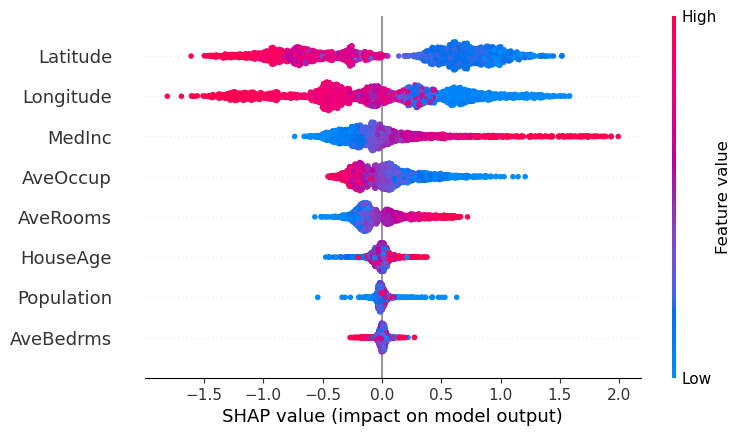

In [8]:
model.beeswarm(X=X.sample(2_500))

 99%|===================| 2480/2500 [00:39<00:00]        

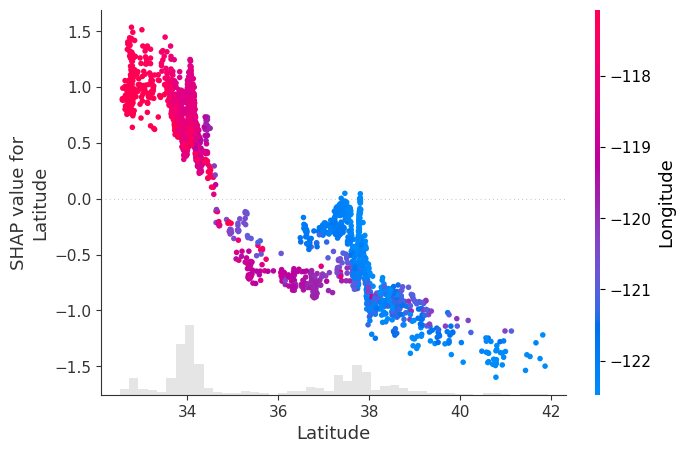

In [9]:
model.scatter(X=X.sample(2_500), feature='Latitude')

# 2. Classification

In [10]:
from apyxl import XGBClassifierWrapper
from sklearn.datasets import fetch_covtype

In [11]:
X, y = fetch_covtype(as_frame=True, return_X_y=True)
y -= 1
print(X.sample(3))

        Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
525551     2939.0    62.0   20.0                             190.0   
580758     2609.0   109.0   35.0                             503.0   
394658     3024.0   175.0   14.0                            1040.0   

        Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
525551                            57.0                           2550.0   
580758                           201.0                            474.0   
394658                           224.0                           2758.0   

        Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
525551          233.0           196.0           87.0   
580758          254.0           179.0           22.0   
394658          227.0           247.0          149.0   

        Horizontal_Distance_To_Fire_Points  ...  Soil_Type_30  Soil_Type_31  \
525551                              1919.0  ...           0.0           0.0   
580758                             

In [12]:
print(y.sample(3))

466071    0
519215    0
414133    0
Name: Cover_Type, dtype: int32


In [13]:
y.unique()

array([4, 1, 0, 6, 2, 5, 3])

In [14]:
X.shape, y.shape

((581012, 54), (581012,))

In [15]:
model = XGBClassifierWrapper().fit(X, y, n=25_000)

In [16]:
model.best_score

0.6311684056855151

In [17]:
model.best_params

{'learning_rate': 0.5499429264984158,
 'n_estimators': 626,
 'max_depth': 12,
 'min_child_weight': 4,
 'subsample': 0.7541003058044731,
 'gamma': 0.2882687913251555,
 'colsample_bytree': 0.868956788694681,
 'reg_alpha': 26.350113724804746,
 'reg_lambda': 201.67893168615558}

In [18]:
shap_values = model.compute_shap_values(X.sample(1_000))

100%|===================| 6976/7000 [03:27<00:00]        

In [19]:
shap_values.shape

(1000, 54, 7)

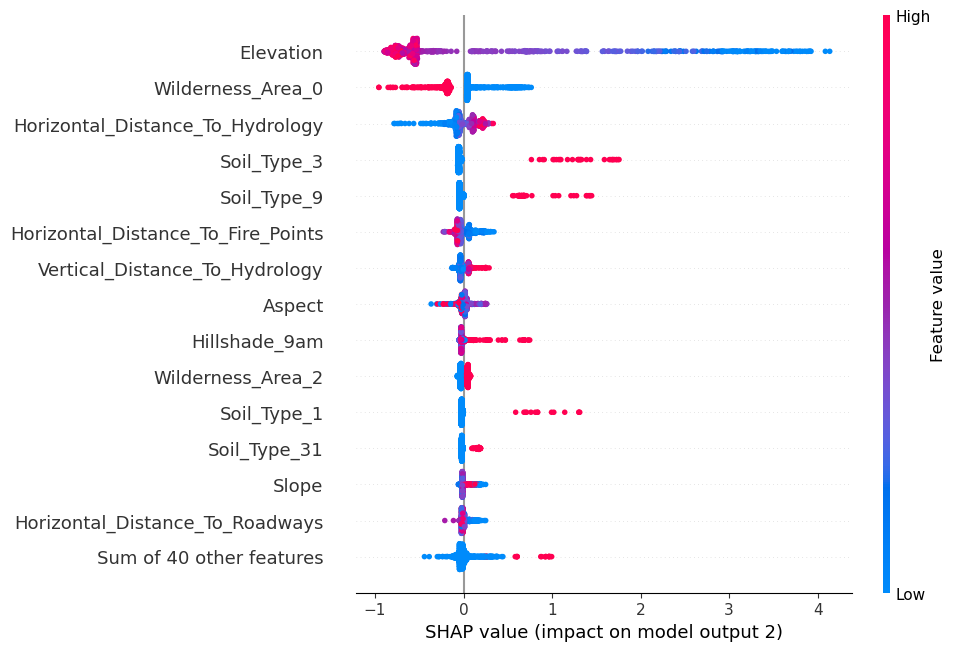

In [20]:
model.beeswarm(shap_values=shap_values, output=2, max_display=15)

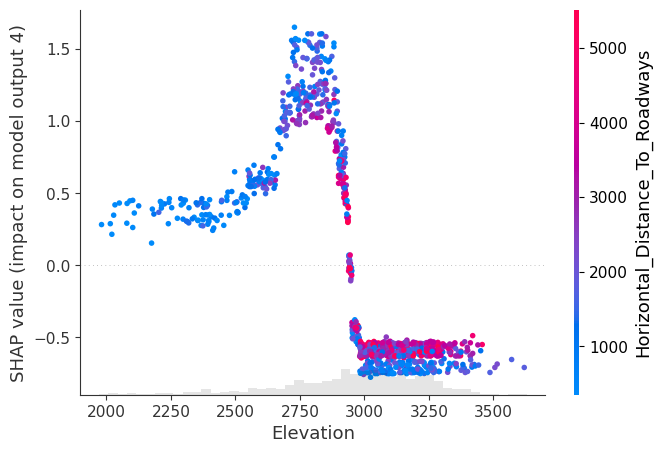

In [21]:
model.scatter(shap_values=shap_values, feature='Elevation', output=4)